In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [3]:
!pip install nltk
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download("omw-1.4")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Unzipping corpora/omw-1.4.zip.


True

In [5]:
import re
import nltk.corpus
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords

# Stemming 
from nltk.stem.porter import PorterStemmer
stemmer=PorterStemmer()

#Lm
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()

In [12]:
f_df = pd.read_csv("features.csv")

patient_notes_df=pd.read_csv("patient_notes.csv")
test_df=pd.read_csv("test.csv")
train_df=pd.read_csv("train.csv")

In [33]:
f_df.head(1)

,feature_num,case_num,feature_text,len_feat_txt,feature_text_exc_stop_words,feature_text_word_count,feature_text_stemmed,feature_text_exc_stop_words_exc_stop_words,feature_text_exc_stop_words_word_count,feature_text_exc_stop_words_stemmed,feature_text_stemmed_exc_stop_words,feature_text_stemmed_word_count,feature_text_stemmed_stemmed
0,0,0,"family history of mi, family history of myocar...",63,"family history mi , family history myocardial ...",10,"famili histori of mi , famili histori of myoca...","family history mi , family history myocardial ...",8,"famili histori mi , famili histori myocardi in...","famili histori mi , famili histori myocardi in...",10,"famili histori of mi , famili histori of myoca..."


In [14]:
def find_length_of_column(x):
    return len(x)

In [15]:
f_df["len_feat_txt"]=f_df["feature_text"].apply(len)

In [32]:
f_df.head(1)

,feature_num,case_num,feature_text,len_feat_txt,feature_text_exc_stop_words,feature_text_word_count,feature_text_stemmed,feature_text_exc_stop_words_exc_stop_words,feature_text_exc_stop_words_word_count,feature_text_exc_stop_words_stemmed,feature_text_stemmed_exc_stop_words,feature_text_stemmed_word_count,feature_text_stemmed_stemmed
0,0,0,"family history of mi, family history of myocar...",63,"family history mi , family history myocardial ...",10,"famili histori of mi , famili histori of myoca...","family history mi , family history myocardial ...",8,"famili histori mi , famili histori myocardi in...","famili histori mi , famili histori myocardi in...",10,"famili histori of mi , famili histori of myoca..."


In [17]:
patient_notes_df.head(1)

,pn_num,case_num,pn_history
0,0,0,"17-year-old male, has come to the student heal..."


In [18]:
train_df.head(1)

,id,case_num,pn_num,feature_num,annotation,location
0,00016_000,0,16,0,['dad with recent heart attcak'],['696 724']


In [19]:
patient_notes_df.pn_history=patient_notes_df.pn_history.astype(str)
#transform train datatypes 
train_df.id = train_df.id.astype(int)
train_df.annotation = train_df.annotation.astype(str)
train_df.location = train_df.location.astype(str)

#transform test datatypes
test_df.id = test_df.id.astype(int)

In [20]:
stop = set(stopwords.words('english'))

In [21]:
text_2="Hello My name is akash---"
token_1 = word_tokenize(text_2)
#np.count_nonzero(token_1)
token_1= re.sub(r"(-)"," ", text_2)
#token_1 = generate_n_grams(text_2)
token_1

'Hello My name is akash   '

In [22]:
# For removing unicode characters from the texts 
def remove_spec_chars(text_):
    text_ = re.sub(r"(@\[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?",
           "", text_)
    return text_;

def replace_hip_space(text_):
    text_ = re.sub(r"(-or-)",", ", text_)
    return re.sub(r"(-)"," ", text_);

#removing stop words from the text 
def remove_stop_words(text, stop=stop):
    #print("stop",stop)
    words = word_tokenize(text)
    text = " ".join([word for word in words if word not in stop])
    return text;

def token_count(text_):
    temp = word_tokenize(text_)
    return np.count_nonzero(temp);

#n_gram function 
def generate_n_grams(text, ngram=1):
    words = [word for word in text.split()]
    temp=zip(*[words[i:] for i in range(0, ngram)])
    ans=[' '.join(ngram) for ngram in temp]
    return ans;

#Stemming=> is the process of getting the root form of a word.
def stem_words(text_):
    word_tokens = word_tokenize(text_)
    stems =' '.join([stemmer.stem(word) for word in word_tokens])
    return stems

#Lemmatize => root form from language --> not required for this dataset
def lemmatize_word(text_):
    word_tokens = word_tokenize(text_)
    lemmas = [lemmatizer.lemmatize(word, pos='v') for word in word_tokens]
    return lemmas


def data_cleaning(df):
    for label,content in df.items():
        if pd.api.types.is_string_dtype(content):
            print(f"Transformation for the column {label} : Started ...")
            df[label]=content.apply(lambda x:x.lower())
            if label !="location":
                df[label]=content.apply(replace_hip_space)
                #df[label]=content.apply(remove_spec_chars) #Not required, as we will be using original text 
                df[label+"_exc_stop_words"]=content.apply(remove_stop_words)
                df[label+"_word_count"]=content.apply(token_count)
                df[label+"_stemmed"]=content.apply(stem_words)
            print(f"Transformation for the column {label} : Ended ...")
    return df;

In [27]:
#Calling Text Cleaning functions for each of the dataframe 
f_df=data_cleaning(f_df)
patient_notes_df=data_cleaning(patient_notes_df)
train_df=data_cleaning(train_df)
test_df=data_cleaning(test_df)

Transformation for the column feature_text : Started ...
Transformation for the column feature_text : Ended ...
Transformation for the column feature_text_exc_stop_words : Started ...
Transformation for the column feature_text_exc_stop_words : Ended ...
Transformation for the column feature_text_stemmed : Started ...
Transformation for the column feature_text_stemmed : Ended ...
Transformation for the column pn_history : Started ...
Transformation for the column pn_history : Ended ...
Transformation for the column annotation : Started ...
Transformation for the column annotation : Ended ...
Transformation for the column location : Started ...
Transformation for the column location : Ended ...


In [28]:
#Checking if special characters are removed or not 
d_quotes = train_df["annotation"].apply(lambda x : x.count("\""))
s_quotes = train_df["annotation"].apply(lambda x : x.count("\'"))
np.average(d_quotes), np.min(d_quotes), np.max(d_quotes), np.average(s_quotes), np.min(s_quotes), np.max(s_quotes)

(0.012867132867132867, 0, 5, 1.7081118881118882, 0, 16)

In [24]:
#Data Visualization
f_df.head(1)
train_df.head(1)

,id,case_num,pn_num,feature_num,annotation,location
0,16000,0,16,0,['dad with recent heart attcak'],['696 724']


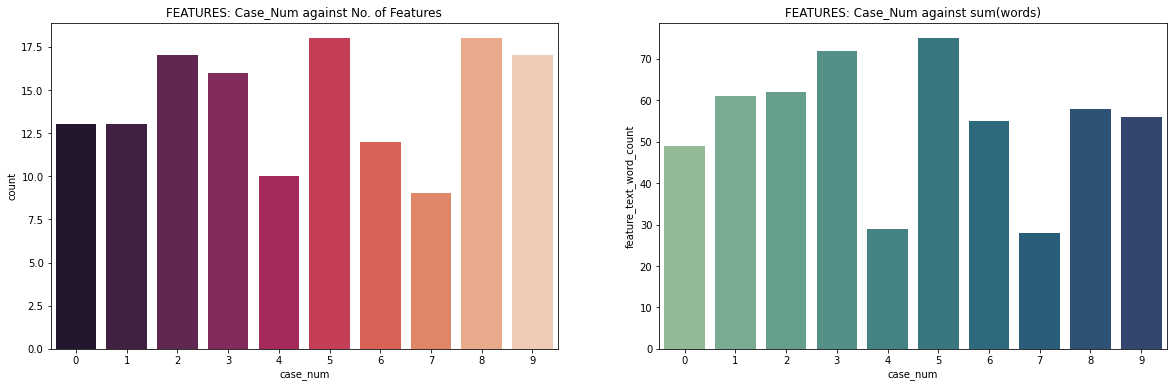

In [35]:
#f_df_count=f_df.groupby(by=["case_num"]).count()
f_df_sum=f_df.groupby(by=["case_num"]).sum()

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,6))
sb.countplot(x=f_df.case_num,  ax=ax[0], palette='rocket', );
sb.barplot(x=f_df_sum.index, y=f_df_sum["feature_text_word_count"], ax=ax[1], palette='crest');
ax[0].set_title("FEATURES: Case_Num against No. of Features");
ax[1].set_title("FEATURES: Case_Num against sum(words)");

In [36]:
patient_notes_df.head(1)

,pn_num,case_num,pn_history,pn_history_exc_stop_words,pn_history_word_count,pn_history_stemmed
0,0,0,"17 year old male, has come to the student heal...","17 year old male , come student health clinic ...",149,"17 year old male , ha come to the student heal..."


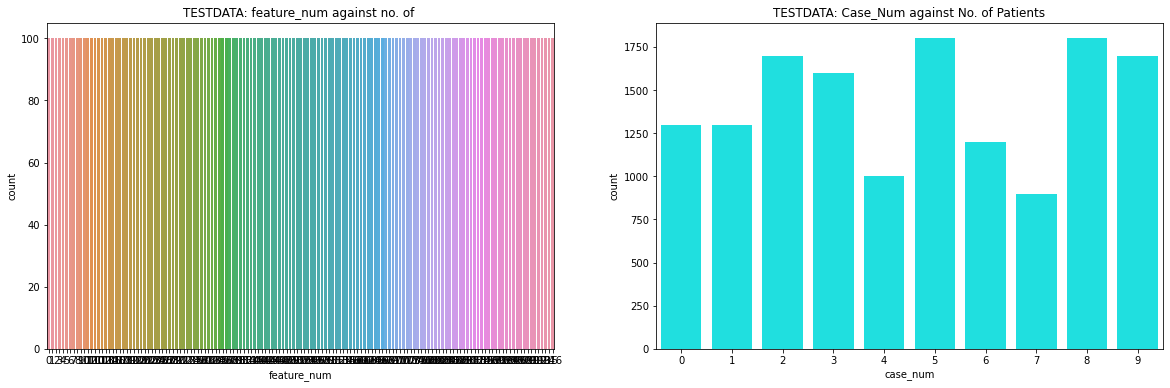

In [37]:
#train_feat_count=train_df.groupby(by=["feature_num"]).count()
#train_case_count=train_df.groupby(by=["case_num"]).count()
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,6))
sb.countplot(x=train_df.feature_num, ax=ax[0]);
sb.countplot(x=train_df.case_num, ax=ax[1], color='cyan');
ax[0].set_title("TESTDATA: feature_num against no. of ");
ax[1].set_title("TESTDATA: Case_Num against No. of Patients");

In [38]:
f_df.head(1)

,feature_num,case_num,feature_text,len_feat_txt,feature_text_exc_stop_words,feature_text_word_count,feature_text_stemmed,feature_text_exc_stop_words_exc_stop_words,feature_text_exc_stop_words_word_count,feature_text_exc_stop_words_stemmed,feature_text_stemmed_exc_stop_words,feature_text_stemmed_word_count,feature_text_stemmed_stemmed
0,0,0,"family history of mi, family history of myocar...",63,"family history mi , family history myocardial ...",10,"famili histori of mi , famili histori of myoca...","family history mi , family history myocardial ...",8,"famili histori mi , famili histori myocardi in...","famili histori mi , famili histori myocardi in...",10,"famili histori of mi , famili histori of myoca..."


In [39]:
f_df["feature_text"][0].replace("-OR-", " ")

'family history of mi, family history of myocardial infarction'